<a href="https://colab.research.google.com/github/treemeister123/CMPE251/blob/main/a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CISC/CMPE 251 Assignment 1 (Programming)

This assignment covers various aspects of data preprocessing, including data exploration, cleaning, outlier detection, feature engineering, normalization, standardization, binning, transformation, and visualization.

The assignment uses the Titanic dataset, which is a classic dataset for practicing data preprocessing and analysis techniques. Here's a brief overview of each question:

1.  Data Exploration: Students will use pandas functions to explore the dataset.
1. Data Cleaning: Handling missing values and removing duplicates.
1. Outlier Detection and Handling: Using statistical methods and visualization to detect and handle outliers.
1. Feature Engineering: Creating new features and encoding categorical variables.
1. Data Normalization and Standardization: Applying different scaling techniques and comparing results.
1. Binning: Creating age groups and visualizing the distribution.
1. Data Transformation: Applying log transformation to handle skewed data.
1. Correlation Analysis: Calculating and visualizing correlations between features.
1. Data Visualization: Creating various plots to gain insights from the data.
1. Feature Selection: Selecting and justifying the most important features for prediction.

### Necessar Packages

In [1]:
# Data Preprocessing Techniques Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

### Load the dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

### Question 1: Data Exploration
- Explore the dataset using appropriate pandas functions.
- a) Display the first 5 rows of the dataset.
- b) Show the basic information about the dataset including column names, data types, and non-null counts.
- c) Calculate and display basic statistics of the numerical columns.

In [3]:
df.head()
# Your code here

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Question 2: Data Cleaning
- a) Identify and handle any missing values in the dataset.
- b) Remove any duplicates if they exist.

In [6]:
# Your code here
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df['Age'] = imputer.fit_transform(df[['Age']])

In [8]:
df.dropna(subset=['Embarked'], inplace=True)

In [9]:
df.duplicated().sum()


0

### Question 3: Outlier Detection and Handling
 - a) Use appropriate statistical methods to detect outliers in the 'Age' column.
 - b) Create a box plot to visualize the outliers.
 - c) Handle the outliers using a method of your choice (e.g., removal, capping).

In [10]:
Q1 = 22
Q3 = 35
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lb) | (df['Age'] > ub)]['Age']
print(outliers)

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
824     2.00
827     1.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 65, dtype: float64


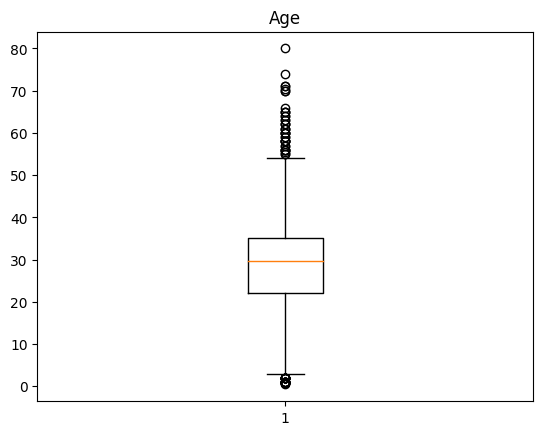

In [11]:
# Your code here

plt.boxplot(df['Age'])
plt.title('Age')
plt.show()

In [12]:
df = df[~df['Age'].isin(outliers)]


### Question 4: Feature Engineering
- a) Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'.
- b) Convert the 'Sex' column to numerical using appropriate encoding.

In [13]:
# Your code here
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(handle_unknown ='ignore')
onehot.fit(df[['Sex']])

onehot_sex = onehot.transform(df[['Sex']]).toarray()

colname = 'Sex'

for i in range(len(onehot.categories_[0])):
    df[colname + '_' + str(onehot.categories_[0][i])] = onehot_sex[:,i]

In [15]:
df = df.drop('Sex', axis=1)


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0.0,1.0


### Question 5: Data Normalization and Standardization
- a) Apply Min-Max scaling to the 'Age' column.
- b) Apply Standardization (Z-score normalization) to the 'Fare' column.
- c) Compare the original and transformed data using histograms.

In [17]:
minmax = MinMaxScaler()
df['Age_scaled'] = minmax.fit_transform(df[['Age']])

In [18]:
standard = StandardScaler()
df['Fare_scaled'] = standard.fit_transform(df[['Fare']])

In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Age_scaled,Fare_scaled
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,8.240000e+02
mean,447.837379,0.379854,2.343447,28.868621,0.508495,0.358010,31.424736,0.866505,0.355583,0.644417,0.507228,-1.077886e-17
std,256.893608,0.485645,0.823268,10.183928,1.091189,0.798987,49.958119,1.594079,0.478980,0.478980,0.199685,1.000607e+00
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.294036e-01
25%,226.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.372549,-4.712593e-01
50%,445.500000,0.000000,3.000000,29.699118,0.000000,0.000000,13.208350,0.000000,0.000000,1.000000,0.523512,-3.648546e-01
75%,671.250000,1.000000,3.000000,34.000000,1.000000,0.000000,30.017700,1.000000,1.000000,1.000000,0.607843,-2.818142e-02
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,9.631999e+00


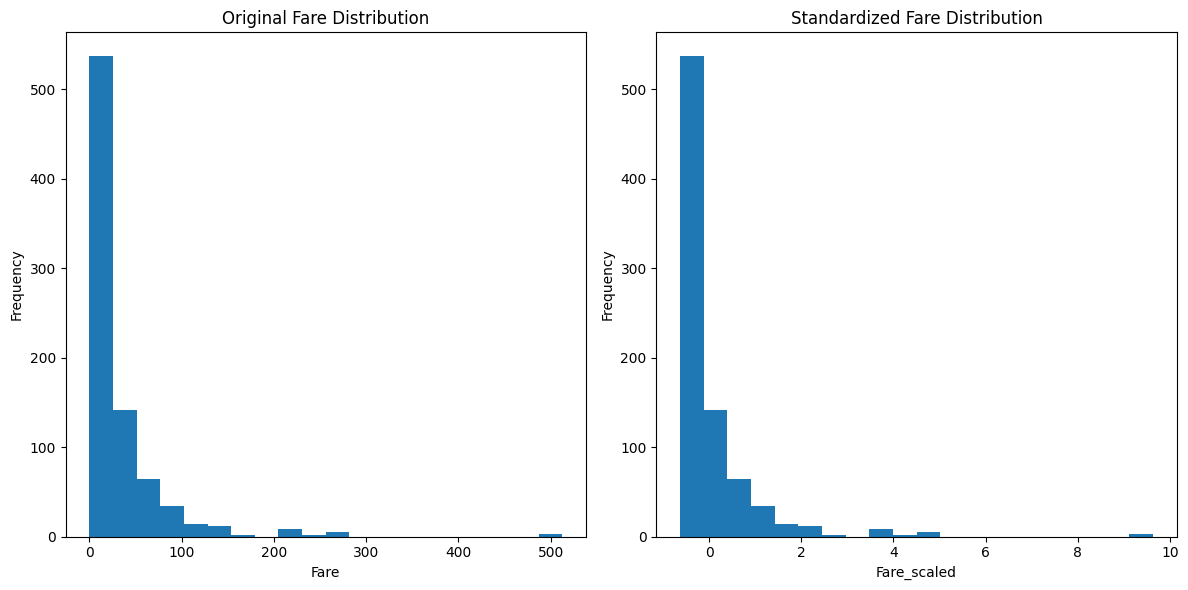

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Fare'], bins=20)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Fare_scaled'], bins=20)
plt.title('Standardized Fare Distribution')
plt.xlabel('Fare_scaled')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


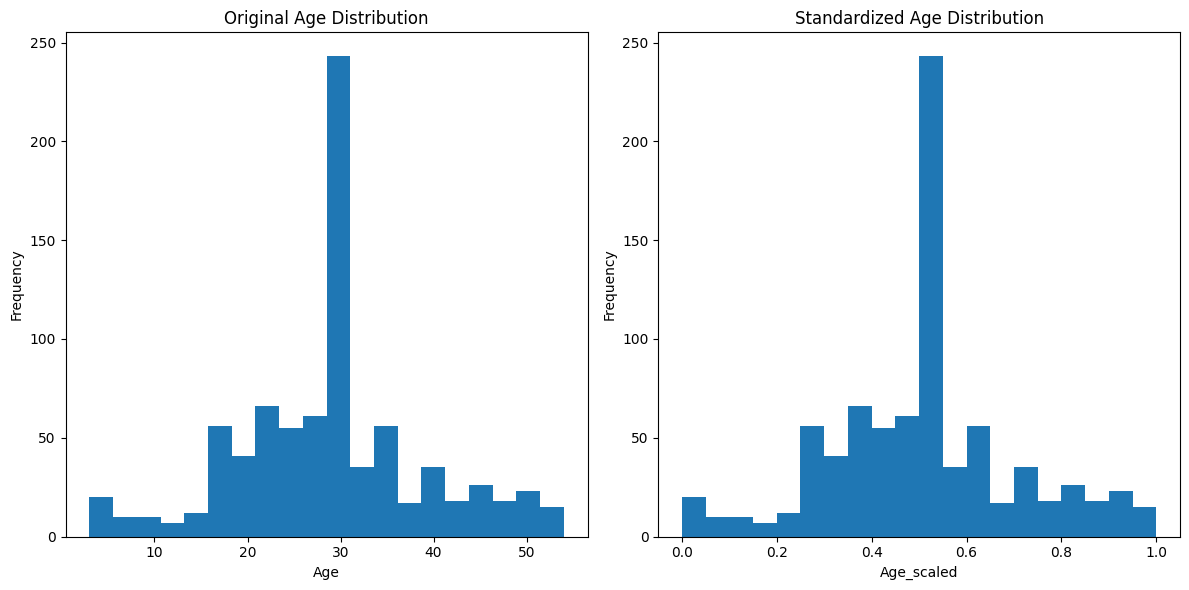

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20)
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Age_scaled'], bins=20)
plt.title('Standardized Age Distribution')
plt.xlabel('Age_scaled')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Question 6: Binning
- a) Create age groups (bins) for the 'Age' column (e.g., 0-18, 19-30, 31-50, 51+).
- b) Visualize the distribution of passengers across these age groups using a bar plot.

In [46]:

# 0-18 bin chosen to represent children, rest are about equal weight
bins = [0, 18, 28, 33, float('inf')]
labels = ['0-18', '19-28', '29-33', '34+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


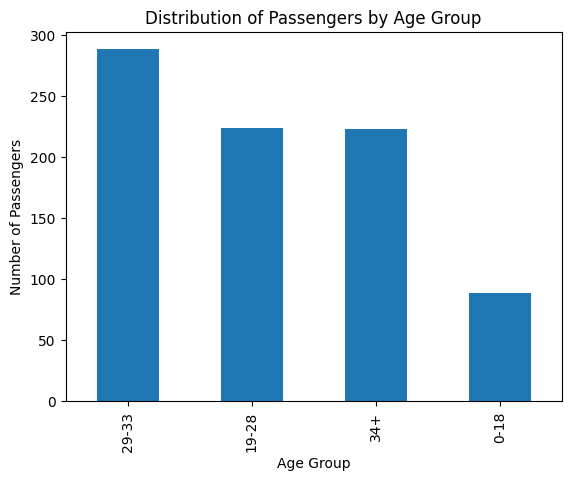

In [47]:
df['AgeGroup'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Age Group')
plt.show()


### Question 7: Data Transformation
- a) Apply a log transformation to the 'Fare' column to handle its skewed distribution.
- b) Visualize the original and transformed 'Fare' distributions using histograms.

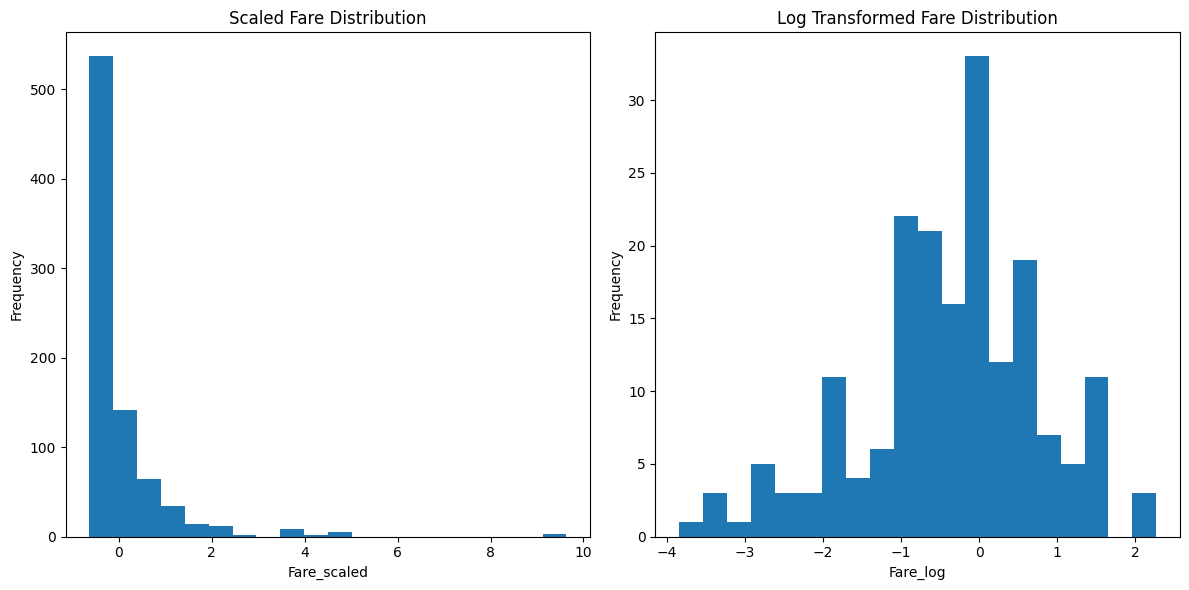

In [58]:
df['Fare_log'] = np.log(df['Fare_scaled'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Fare_scaled'], bins=20)
plt.title('Scaled Fare Distribution')
plt.xlabel('Fare_scaled')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Fare_log'], bins=20)
plt.title('Log Transformed Fare Distribution')
plt.xlabel('Fare_log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Question 8: Correlation Analysis
- a) Calculate the correlation matrix for numerical features.
- b) Create a heatmap to visualize the correlations.
- c) Identify and list the top 3 most correlated feature pairs.

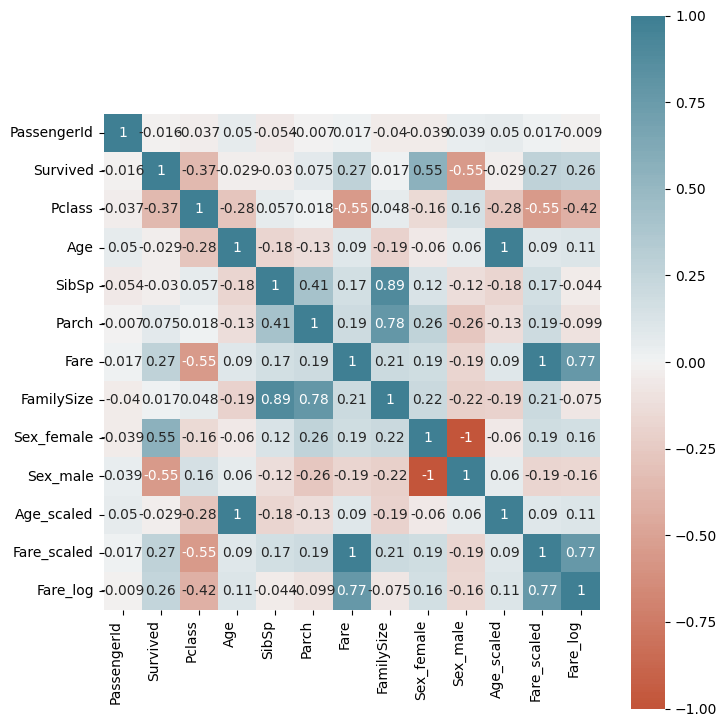

In [62]:
f, ax = plt.subplots(figsize=(8, 9))
df_numerical = df.select_dtypes(include=np.number)
corr = df_numerical.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0, annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### Top 3 most correlated pairs
- Sex_male and Sex_female (negatively correlated)
- FamilySize and SibSp
- familySize and Parch
### Of original features
- Sex_male/Sex_female and Survived
- SibSp and Parch
- PClass and Fare

### Question 9: Data Visualization
- Create at least three different types of plots to reveal insights about the dataset.
- Explain your findings for each plot.

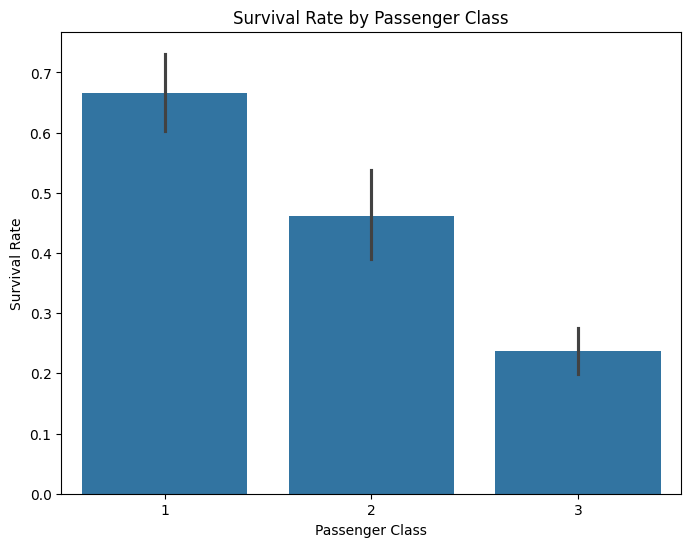

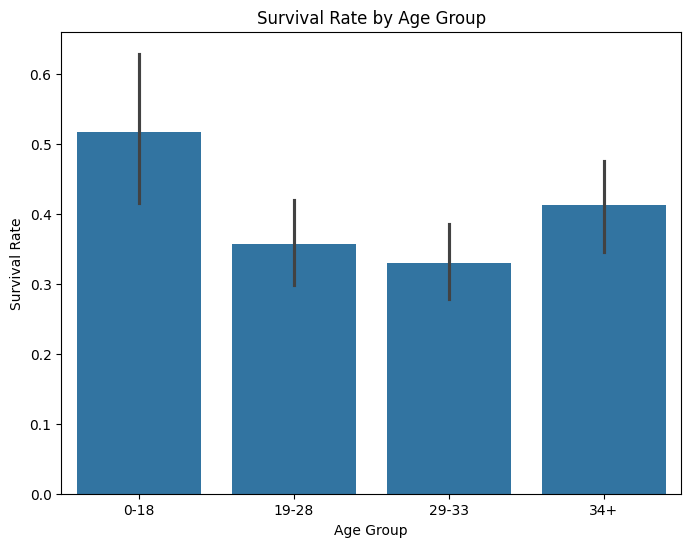

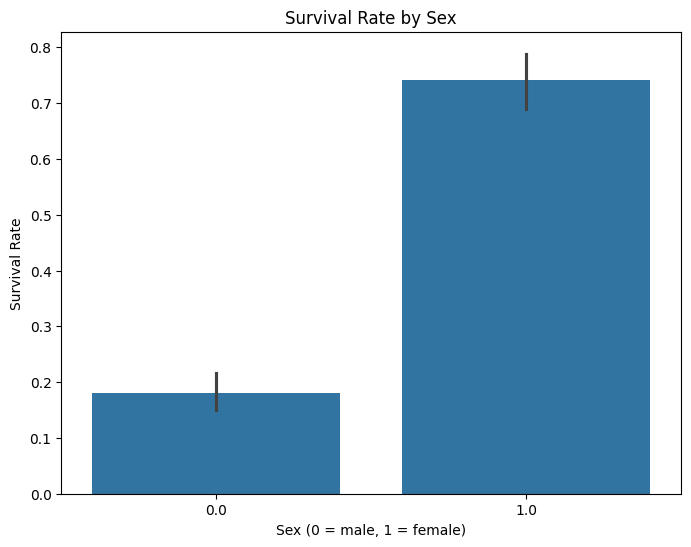

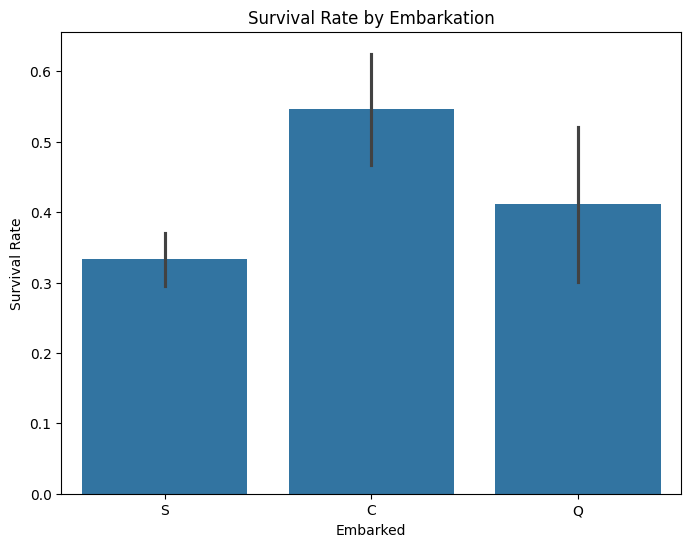

In [103]:
#bar plots showing survival by sex, class, and age
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex_female', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = male, 1 = female)')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

### Each plot reveals an interesting relation between survival rate and the features I assumed would be the most indicative of predicting survival rate. It is clear that there is correlation between both sex and class and survival rate, while age is less clear

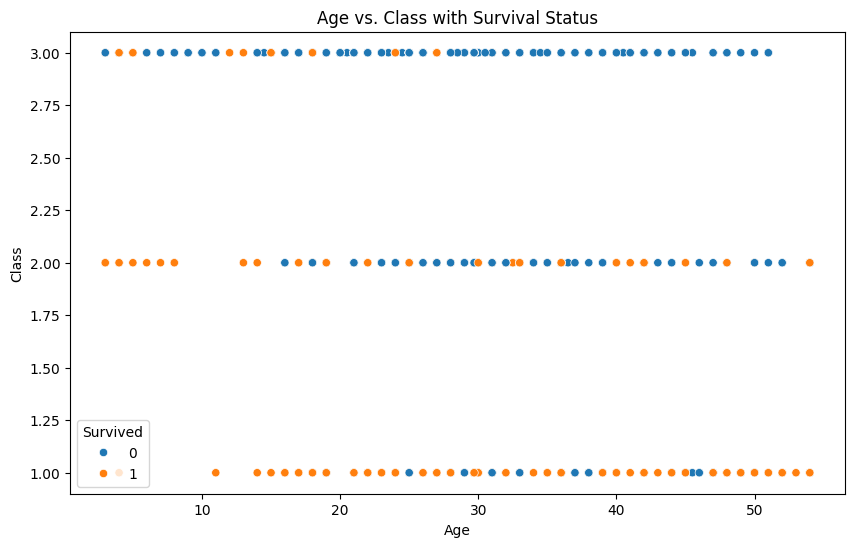

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=df)
plt.title('Age vs. Class with Survival Status')
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()


### This plot reveals how the combination of class and age can help predict survival. Although very few in class 3 survived, those in class 2 had a much higher chance of survival if they were children.

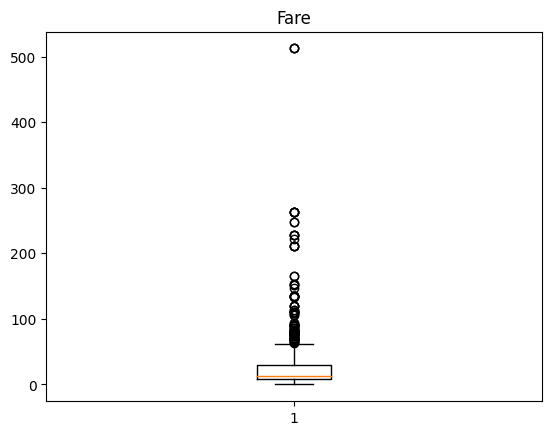

In [86]:
plt.boxplot(df['Fare'])
plt.title('Fare')
plt.show()

### This boxplot show the presence of an extreme outlier in the 'Fare' column. This shows that more processing of the data is necessary to use the data in a meaningful way.


### Question 10: Feature Selection
- Based on your analysis, select the top 5 features you believe are most important for predicting survival.
- Justify your choices.





### Based on my analysis, these are the 5 features I believe are most important in predicting survival

- Sex: There is correlation between sex and survival, and the difference in survival rates above is substantial.

- Pclass: The plots above clearly show that those in class 1 had a muh higher rate of survival.

- Age: Although the correlation coefficient is small, I believe that when combined with other features, age is a good predictor. Correlation is likely low due to young children dying in class 3, and older people surviving in class 1. However, a good predictive model could account for age in the context of other features like class to show younger people are more likely to survive within a class.

- Fare: Since fare is correlated to class, fare is naturally a predictor of survival, albeit less effectively than class. The Fare data is likely biased by outliers currently.

- Embarked: the above plot shows there is significant variation in survival rate based on the embarked designation. I believe this feature is the least important of the five mentioned.